# Pet Shelter Analysis 
* Data from: https://www.kaggle.com/datasets/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes

In [20]:
import pandas as pd
import numpy as np
import datetime

# Import csv files and check the basic info on each

In [21]:
# https://datascientyst.com/read-analyse-large-csv-file-pandas-dask/
intakes = pd.read_csv('/Users/william/Documents/Treehouse/code/Python/Unit-Projects/pet-shelter-analysis/aac_intakes.csv')
outcomes = pd.read_csv('/Users/william/Documents/Treehouse/code/Python/Unit-Projects/pet-shelter-analysis/aac_outcomes.csv')
intakes_outcomes = pd.read_csv('/Users/william/Documents/Treehouse/code/Python/Unit-Projects/pet-shelter-analysis/aac_intakes_outcomes.csv')


In [22]:
intakes_outcomes.head()

age_upon_outcome animal_id_outcome        date_of_birth outcome_subtype  \
0         10 years           A006100  2007-07-09 00:00:00             NaN   
1          7 years           A006100  2007-07-09 00:00:00             NaN   
2          6 years           A006100  2007-07-09 00:00:00             NaN   
3         10 years           A047759  2004-04-02 00:00:00         Partner   
4         16 years           A134067  1997-10-16 00:00:00             NaN   

      outcome_type sex_upon_outcome  age_upon_outcome_(days)  \
0  Return to Owner    Neutered Male                     3650   
1  Return to Owner    Neutered Male                     2555   
2  Return to Owner    Neutered Male                     2190   
3         Transfer    Neutered Male                     3650   
4  Return to Owner    Neutered Male                     5840   

   age_upon_outcome_(years) age_upon_outcome_age_group     outcome_datetime  \
0                      10.0                (7.5, 10.0]  2017-12-07 14:07:00   
1                       7.0                 (5.0, 7.5]  2014-12-20 16:35:00   
2                       6.0                 (5.0, 7.5]  2014-03-08 17:10:00   
3                      10.0                (7.5, 10.0]  2014-04-07 15:12:00   
4                      16.0               (15.0, 17.5]  2013-11-16 11:54:00   

   ...  age_upon_intake_age_group      intake_datetime intake_month  \
0  ...                (7.5, 10.0]  2017-12-07 00:00:00           12   
1  ...                 (5.0, 7.5]  2014-12-19 10:21:00           12   
2  ...                 (5.0, 7.5]  2014-03-07 14:26:00            3   
3  ...                (7.5, 10.0]  2014-04-02 15:55:00            4   
4  ...               (15.0, 17.5]  2013-11-16 09:02:00           11   

  intake_year  intake_monthyear  intake_weekday  intake_hour  intake_number  \
0        2017           2017-12        Thursday           14            1.0   
1        2014           2014-12          Friday           10            2.0   
2        2014           2014-03          Friday           14            3.0   
3        2014           2014-04       Wednesday           15            1.0   
4        2013           2013-11        Saturday            9            1.0   

             time_in_shelter time_in_shelter_days  
0  0 days 14:07:00.000000000             0.588194  
1  1 days 06:14:00.000000000             1.259722  
2  1 days 02:44:00.000000000             1.113889  
3  4 days 23:17:00.000000000             4.970139  
4  0 days 02:52:00.000000000             0.119444  

[5 rows x 41 columns]

In [23]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80681 entries, 0 to 80680
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  80673 non-null  object
 1   animal_id         80681 non-null  object
 2   animal_type       80681 non-null  object
 3   breed             80681 non-null  object
 4   color             80681 non-null  object
 5   date_of_birth     80681 non-null  object
 6   datetime          80681 non-null  object
 7   monthyear         80681 non-null  object
 8   name              56116 non-null  object
 9   outcome_subtype   36893 non-null  object
 10  outcome_type      80667 non-null  object
 11  sex_upon_outcome  80679 non-null  object
dtypes: object(12)
memory usage: 7.4+ MB


# 1. Is there an area where more pets are found?
Find the top 5 places where animals are found so the shelter can coordinate with local volunteers and animal control to monitor these areas.

Hint: Try to group the found locations together.

In [24]:
# https://datascientyst.com/get-top-10-highest-lowest-values-pandas/
grouped_by_found_location = intakes.groupby('found_location')
top_fifteen_locations = grouped_by_found_location.size().nlargest(n=15)
print(top_fifteen_locations)

found_location
Austin (TX)                              14443
Outside Jurisdiction                       948
Travis (TX)                                921
7201 Levander Loop in Austin (TX)          517
Del Valle (TX)                             411
Pflugerville (TX)                          372
Manor (TX)                                 280
4434 Frontier Trl in Austin (TX)           163
124 W Anderson Ln in Austin (TX)           153
Leander (TX)                               113
1156 W Cesar Chavez in Austin (TX)          98
12034 Research Blvd in Austin (TX)          98
12034 Research in Austin (TX)               96
1834 Ferguson in Austin (TX)                90
1156 W Cesar Chavez St in Austin (TX)       74
dtype: int64


### The top 5 places in Austin where animals were found were 7201 Levander Loop, 4434 Frontier Trl, 124 W Anderson Ln, 1156 W Cesar Chavez, and 12034 Research Blvd. 

This information was found by grouping the intakes data by 'found_location' and then using nlargest to get the top fifteen locations. Locations outside of Austin or 'other' categories, such as 'Outside Jurisdiction', were removed so that workers could focus on specific areas. 

# 2. What is the average number of pets found in a month in the year 2015? Are there months where there is a higher number of animals found?
Knowing the number of pets the shelter might see in a month can help them gather enough resources and donations to care for the animals they receive.

In [25]:
# https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
intakes['datetime'] = pd.to_datetime(intakes['datetime'])

# https://datascientyst.com/convert-month-number-to-month-name-pandas-dataframe/
intakes['month_found'] = intakes['datetime'].dt.month_name()
intakes['year_found'] = intakes['datetime'].dt.year

#The below also work but are longer. Maybe because 'datetime' is already imported, 'dt' can be used
#intakes['month_found'] = pd.DatetimeIndex(intakes['datetime']).month_name()
#intakes['year_found'] = pd.DatetimeIndex(intakes['datetime']).year


In [26]:
average_pets_found_in_2015 = round(intakes[intakes['year_found'] == 2015].groupby('month_found').size().mean())
print(f'In 2015, the average number of pets found per month was approximately {average_pets_found_in_2015}')

In 2015, the average number of pets found per month was approximately 1559


In [27]:
group_by_month_found = intakes[intakes['year_found'] == 2015].groupby('month_found')
highest_months = group_by_month_found.size().nlargest(n=3)

print(highest_months)
print(f'The months with the highest number of animals found were {highest_months.index[0]}, {highest_months.index[1]}, and {highest_months.index[2]}')



month_found
June       2189
May        2094
October    1740
dtype: int64
The months with the highest number of animals found were June, May, and October


### In 2015, the average number of pets found per month was approximately 1559

### The months with the highest number of animals found were June, May, and October

To start, new columns for month and year found were created by extracting the information from the datetime column and saving them as integers in new columns. 
To get the average found in 2015, the intakes data was filtered for entries from 2015, that was grouped by the month found, 'size()' was used to get the number found each month, and 'mean()' was used to get the average of the generated column.
To get the months with the highest number of animals found, the intakes data was once again filtered for entries from 2015, grouped by the month found, and 'size()' was used to get the number found each month. nlargest(n=3) was then used to find the three columns with the largest entries.

# 3. What is the ratio of incoming pets vs. adopted pets?
This key metric helps the shelter know how they are doing.

In [28]:
# https://docs.python.org/3/library/fractions.html
# https://bobbyhadz.com/blog/python-attributeerror-float-object-has-no-attribute-round
from fractions import Fraction
total_incoming_pets = len(intakes_outcomes)
total_adopted_pets = len(intakes_outcomes[intakes_outcomes['outcome_type'] == 'Adoption'])
incoming_vs_adopted_fraction = Fraction(total_adopted_pets/total_incoming_pets).limit_denominator(10)
incoming_vs_adopted_percent = round(((total_adopted_pets/total_incoming_pets)*100), 2)
print(f'The ratio of incoming pets to adopted pets is approximately: {incoming_vs_adopted_fraction.denominator}:{incoming_vs_adopted_fraction.numerator}\nSo about {incoming_vs_adopted_percent}% of pets are adopted.')



The ratio of incoming pets to adopted pets is approximately: 7:3
So about 42.17% of pets are adopted.


### The ratio of incoming pets to adopted pets is approximately: 7:3
### So about 42.17% of pets are adopted.

The lenth of the incomes_outcomes file was used to determine the total number of pets taken in, and the total number of pets adopted was found by filtering the file by 'outcome_type' that equaled 'Adoption'. By using the Fractions module, the numerator and denominator of the resultind fraction could be used to show the ratio.

# 4. What is the distribution of the types of animals in the shelter?
Find the count of each type of animal in the shelter.

animal_type
Bird           342
Cat          29659
Dog          45743
Livestock        9
Other         4434
dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


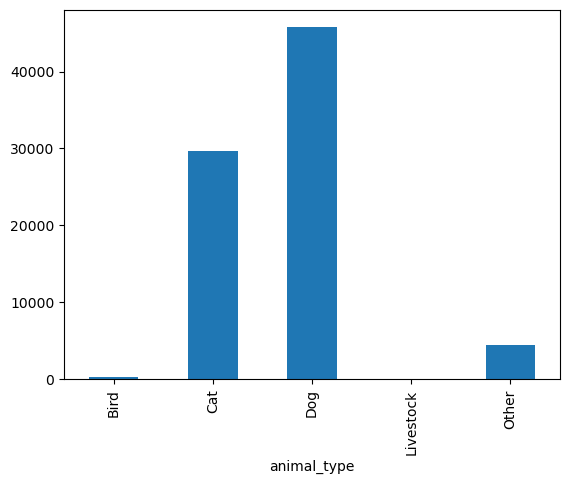

In [29]:
import matplotlib.pyplot as plt
count_by_animal = intakes.groupby('animal_type').size()
count_by_animal_graph = intakes.groupby('animal_type').size().plot.bar()
print(count_by_animal)
print(count_by_animal_graph)

### The number of animals in the shelter are as follows: 
* Dog: 45,743
* Cat: 29,659
* Bird: 342
* Livestock: 9
* Other: 4434

This information was determined by grouping the intakes by 'animal_type' and then getting the number for each group by using 'size()'

# 5. What are the adoption rates for specific breeds?
Find the top 5 dog breeds in the shelter (based on count) and then find the adoption percentage of each breed.

In [30]:
# https://stackoverflow.com/questions/18327624/find-elements-index-in-pandas-series
top_dog_breeds_in_shelter_series = outcomes[outcomes['animal_type'] == 'Dog'].groupby('breed').size().nlargest(n=5)

for label, value in top_dog_breeds_in_shelter_series.items():
    number_adopted = len(outcomes[(outcomes['breed'] == label) & (outcomes['outcome_type'] == 'Adoption')])
    print(f'The adoption rate for {label} is {round((number_adopted/value)*100)}%')


The adoption rate for Pit Bull Mix is 37%
The adoption rate for Chihuahua Shorthair Mix is 47%
The adoption rate for Labrador Retriever Mix is 50%
The adoption rate for German Shepherd Mix is 48%
The adoption rate for Australian Cattle Dog Mix is 56%


### The adoption rates for specific dog breeds is as follows:
* The adoption rate for Pit Bull Mix is 37%
* The adoption rate for Chihuahua Shorthair Mix is 47%
* The adoption rate for Labrador Retriever Mix is 50%
* The adoption rate for German Shepherd Mix is 48%
* The adoption rate for Australian Cattle Dog Mix is 56%

This information was determined by first finding the top 5 dog breeds in the shelter by filtering for dogs, grouping by breed, using 'size()' to get the number for each breed, and finally using 'nlargest(n=5)' to get the top 5. After this, the resulting dog breeds were used to filter the outcomes data and find the number of each breed that had been adopted. With these two pieces of information, the adoption percentage was determined.

# 6. What are the adoption rates for different colorings?
Find the top 5 colorings in the shelter (based on count) and then find the adoption percentage of each color.

In [31]:
top_colorings_in_shelter_series = outcomes.groupby('color').size().nlargest(n=5)

for label, value in top_colorings_in_shelter_series.items():
    number_adopted = len(outcomes[(outcomes['color'] == label) & (outcomes['outcome_type'] == 'Adoption')])
    print(f'The adoption rate for {label} pets is {round((number_adopted/value)*100)}%')


The adoption rate for Black/White pets is 45%
The adoption rate for Black pets is 41%
The adoption rate for Brown Tabby pets is 42%
The adoption rate for Brown pets is 22%
The adoption rate for White pets is 38%


### The adoption rates for different colorings is as follows:
* The adoption rate for Black/White pets is 45%
* The adoption rate for Black pets is 41%
* The adoption rate for Brown Tabby pets is 42%
* The adoption rate for Brown pets is 22%
* The adoption rate for White pets is 38%

This information was determined by first finding the top 5 colorings in the shelter by grouping by color, using 'size()' to get the number for each breed, and finally using 'nlargest(n=5)' to get the top 5. After this, the resulting colorings were used to filter the outcomes data and find the number of each coloring that had been adopted. With these two pieces of information, the adoption percentage was determined.

# 7. About how many animals are spayed/neutered each month?
This will help the shelter allocate resources and staff. Assume that all intact males and females will be spayed/neutered.

In [32]:
total_intact_pets_by_year = intakes[(intakes['sex_upon_intake'] == 'Intact Male') | (intakes['sex_upon_intake'] == 'Intact Female')].groupby('year_found').size()
total_intact_pets_by_year_cleaned = total_intact_pets_by_year.drop(labels = [2013, 2018])
avg_per_month = round((total_intact_pets_by_year_cleaned.sum())/((len(total_intact_pets_by_year_cleaned))*12))

print(f'About {avg_per_month} animals are spayed/neutered each month')


About 933 animals are spayed/neutered each month


### About 933 animals are spayed/neutered each month

To determine this information, the intakes file was filtered based on 'sex_upon_intake' being either 'Intact Male' or 'Intact Female', grouping by the year found, and then using 'size()' to get the number of animals spayed/neutered each year. The first and last years were not complete years, so they were dropped. Finally, the number of remaining intact animals was combined and then divided by the total number of months over which they occurred. 

# EE-1. How many animals in the shelter are repeats? Which animal was returned to the shelter the most?
This means the animal has been brought in more than once.

In [33]:
intakes_by_id = intakes.groupby('animal_id').size()
number_of_repeats = intakes_by_id[intakes_by_id > 1].count()
print(f'{number_of_repeats} animals have been brought in more than once')

6154 animals have been brought in more than once


In [34]:
most_repeat_visits = intakes_by_id.nlargest(n=1)

#https://stackoverflow.com/questions/24273130/get-first-element-of-series-without-knowing-the-index
name_of_pet_with_most_repeat_visits = intakes[intakes['animal_id'] == most_repeat_visits.index[0]]['name'].iloc[0]
pet_with_most_repeat_visits_type = intakes[intakes['animal_id'] == most_repeat_visits.index[0]]['breed'].iloc[0]
number_of_visits = intakes[intakes['animal_id'] == most_repeat_visits.index[0]]['name'].count()
print(f'With {number_of_visits} visits, {name_of_pet_with_most_repeat_visits}, a {pet_with_most_repeat_visits_type} with the id of {most_repeat_visits.index[0]}, has visited the shelter the most.')



With 13 visits, Lil Bit, a Rat Terrier Mix with the id of A721033, has visited the shelter the most.


### 6154 animals have been brought in more than once
### With 13 visits, Lil Bit, a Rat Terrier Mix with the id of A721033, has visited the shelter the most.

To get the total number of repeat animals, the intakes file was grouped by 'animal_id' and 'size()' was used to set the number of time that id was present. Finally, a count was taken of each id that showed up more than once by filtering for ids with a size greater than 1 and using 'count()' to determine the final number of repeats.

To get the animal with the most repeat visits, nlargest(n=1) was used with the previously generated data to find the column with the largest number repeat vists. The animal_id for this animal was then used to select futher information, such as the animals name and breed. 

# EE-2. What are the adoption rates for the following age groups?
* baby: 4 months and less
* young: 5 months - 2 years
* adult: 3 years - 10 years
* senior: 11+

In [35]:
age_at_outcome_total = intakes_outcomes.groupby('age_upon_outcome_(days)').size()
age_at_outcome_adopted = intakes_outcomes[intakes_outcomes['outcome_type'] == 'Adoption'].groupby('age_upon_outcome_(days)').size()
#print(age_at_outcome_total.sum())
#print(age_at_outcome_adopted)

total_baby = age_at_outcome_total[age_at_outcome_total.index < 152].sum()
total_young = age_at_outcome_total[(age_at_outcome_total.index >= 152) & (age_at_outcome_total.index < 1096)].sum()
total_adult = age_at_outcome_total[(age_at_outcome_total.index >= 1096) & (age_at_outcome_total.index < 4018)].sum()
total_senior = age_at_outcome_total[age_at_outcome_total.index >= 4018].sum()

adopted_baby = age_at_outcome_adopted[age_at_outcome_adopted.index < 152].sum()
adopted_young = age_at_outcome_adopted[(age_at_outcome_adopted.index >= 152) & (age_at_outcome_adopted.index < 1096)].sum()
adopted_adult = age_at_outcome_adopted[(age_at_outcome_adopted.index >= 1096) & (age_at_outcome_adopted.index < 4018)].sum()
adopted_senior = age_at_outcome_adopted[age_at_outcome_adopted.index >= 4018].sum()

baby_adoption_rate = round((adopted_baby/total_baby)*100)
young_adoption_rate = round((adopted_young/total_young)*100)
adult_adoption_rate = round((adopted_adult/total_adult)*100)
senior_adoption_rate = round((adopted_senior/total_senior)*100)

print(f'The adoption rate for the "baby" age group is {baby_adoption_rate}%')
print(f'The adoption rate for the "young" age group is {young_adoption_rate}%')
print(f'The adoption rate for the "adult" age group is {adult_adoption_rate}%')
print(f'The adoption rate for the "senior" age group is {senior_adoption_rate}%')


The adoption rate for the "baby" age group is 51%
The adoption rate for the "young" age group is 40%
The adoption rate for the "adult" age group is 32%
The adoption rate for the "senior" age group is 19%


### The adoption rates for the given age groups are as follows:
* The adoption rate for the "baby" age group is 51%
* The adoption rate for the "young" age group is 40%
* The adoption rate for the "adult" age group is 32%
* The adoption rate for the "senior" age group is 19%

First numbers for total outcomes and total adoptions were set by using 'size()' on data set formed from grouping by age_upon_outcome_(days) and age_upon_outcome_(days) after filtering by 'outcome_type'] == 'Adoption'. With this, numbers for all outcomes and adopted were set for each age group by using conditional filtering of the previously generated totals. By dividing the total by the corresponding adopted number, the adoption rate per age group was generated.  

# EE-3. If spay/neuter for a dog costs 100 dollars and a spay/neuter for a cat costs 50 dollars, how much did the shelter spend in 2015 on these procedures?

In [36]:
intact_dogs_in_2015 = intakes[((intakes['animal_type'] == 'Dog') & (intakes['year_found'] == 2015)) & ((intakes['sex_upon_intake'] == 'Intact Male') | (intakes['sex_upon_intake'] == 'Intact Female'))].groupby('year_found').size()
intact_cats_in_2015 = intakes[((intakes['animal_type'] == 'Cat') & (intakes['year_found'] == 2015)) & ((intakes['sex_upon_intake'] == 'Intact Male') | (intakes['sex_upon_intake'] == 'Intact Female'))].groupby('year_found').size()
cost_per_dog = 100
cost_per_cat = 50
cost_for_all_dogs_2015 = intact_dogs_in_2015.iloc[0]*cost_per_dog
cost_for_all_cats_2015 = intact_cats_in_2015.iloc[0]*cost_per_cat
total_costs_2015 = cost_for_all_dogs_2015 + cost_for_all_cats_2015

print(f'In 2015, the shelter spent a total of ${total_costs_2015} for these procedures. ${cost_for_all_dogs_2015} for dogs and ${cost_for_all_cats_2015} for cats')



In 2015, the shelter spent a total of $863250 for these procedures. $610000 for dogs and $253250 for cats


### In 2015, the shelter spent a total of 863,250 dollars for these procedures. 610,000 for dogs and 253,250 for cats.

To get the total cost, first, the number of intact dogs and cats was found by filtering by animal type, year found, and sex upon intake. These two totals were multiplied by the cost for the procedure for their respective animals. By adding these two costs together, a final cost was determined. 